21.03.24 ML_DL 손글씨 데이터 분석 예제

# 딥러닝 기초_손글씨 데이터 

In [2]:
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
import tensorflow.keras.utils as utils # 원핫 인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)

In [3]:
# 1. 데이터 셋 준비하기
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

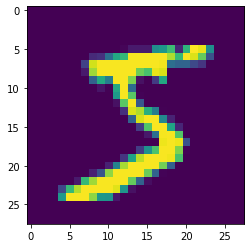

In [6]:
plt.imshow(X_train[0])

In [7]:
Y_train[0]

5

In [8]:
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [9]:
# 훈련셋 - model이 학습할 때 사용
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [10]:
# 검증셋 - model이 학습할 떼 사용
len(X_val), len(Y_val)

(10000, 10000)

In [11]:
# 훈련셋 - model 평가할 때 사용 
len(X_test), len(Y_test)

(10000, 10000)

In [12]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [13]:
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0

In [14]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [15]:
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

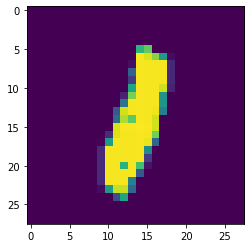

In [16]:
plt.imshow(X_train[0].reshape(28,28))

In [17]:
Y_train[0]

1

In [18]:
Y_train.shape, Y_val.shape, Y_test.shape

((700,), (300,), (10000,))

In [19]:
# 원 핫 인코딩 = 라벨링 전환 
# 0 => 1 0 0 0 0 0 0 0 0 0 
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

In [20]:
Y_train.shape, Y_val.shape, Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [21]:
Y_train[0]
# 전처리 끝

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val))

Epoch 1/1000
70/70 [==============================] - 1s 13ms/step - loss: 2.2976 - accuracy: 0.1297 - val_loss: 2.2771 - val_accuracy: 0.1200
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2611 - accuracy: 0.0955 - val_loss: 2.2451 - val_accuracy: 0.1233
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2215 - accuracy: 0.1347 - val_loss: 2.2077 - val_accuracy: 0.1767
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1772 - accuracy: 0.1598 - val_loss: 2.1703 - val_accuracy: 0.1933
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1429 - accuracy: 0.1624 - val_loss: 2.1279 - val_accuracy: 0.1900
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1079 - accuracy: 0.1627 - val_loss: 2.0847 - val_accuracy: 0.2333
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0820 - accuracy: 0.1907 - val_loss: 2.0459 - val_accuracy: 0.2967
Epoch

70/70 [==============================] - 0s 1ms/step - loss: 1.2859 - accuracy: 0.5358 - val_loss: 1.4165 - val_accuracy: 0.4367
Epoch 59/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2624 - accuracy: 0.5401 - val_loss: 1.4130 - val_accuracy: 0.4267
Epoch 60/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2665 - accuracy: 0.5187 - val_loss: 1.4024 - val_accuracy: 0.4567
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2044 - accuracy: 0.5513 - val_loss: 1.4038 - val_accuracy: 0.4500
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2549 - accuracy: 0.5230 - val_loss: 1.3977 - val_accuracy: 0.4433
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2254 - accuracy: 0.5510 - val_loss: 1.4029 - val_accuracy: 0.4300
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1949 - accuracy: 0.5409 - val_loss: 1.3940 - val_accuracy: 0.4333
Epoch 65/1000

70/70 [==============================] - 0s 1ms/step - loss: 1.0838 - accuracy: 0.6196 - val_loss: 1.3559 - val_accuracy: 0.4300
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0560 - accuracy: 0.6099 - val_loss: 1.3514 - val_accuracy: 0.4200
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0698 - accuracy: 0.6199 - val_loss: 1.3588 - val_accuracy: 0.4200
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0106 - accuracy: 0.6413 - val_loss: 1.3554 - val_accuracy: 0.4400
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0470 - accuracy: 0.6032 - val_loss: 1.3625 - val_accuracy: 0.4167
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0882 - accuracy: 0.5902 - val_loss: 1.3507 - val_accuracy: 0.4333
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0327 - accuracy: 0.6229 - val_loss: 1.3541 - val_accuracy: 0.4267
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9414 - accuracy: 0.6540 - val_loss: 1.3746 - val_accuracy: 0.4233
Epoch 173/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9621 - accuracy: 0.6291 - val_loss: 1.3754 - val_accuracy: 0.4300
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9484 - accuracy: 0.6651 - val_loss: 1.3783 - val_accuracy: 0.4267
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9131 - accuracy: 0.6721 - val_loss: 1.3864 - val_accuracy: 0.4400
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9665 - accuracy: 0.6326 - val_loss: 1.3790 - val_accuracy: 0.4267
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9247 - accuracy: 0.6231 - val_loss: 1.3746 - val_accuracy: 0.4200
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9327 - accuracy: 0.6460 - val_loss: 1.3688 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9068 - accuracy: 0.6711 - val_loss: 1.4171 - val_accuracy: 0.4367
Epoch 230/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8753 - accuracy: 0.6819 - val_loss: 1.4210 - val_accuracy: 0.4267
Epoch 231/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8986 - accuracy: 0.6544 - val_loss: 1.4137 - val_accuracy: 0.4167
Epoch 232/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9445 - accuracy: 0.6396 - val_loss: 1.4279 - val_accuracy: 0.4300
Epoch 233/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9168 - accuracy: 0.6547 - val_loss: 1.4276 - val_accuracy: 0.4333
Epoch 234/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8886 - accuracy: 0.6611 - val_loss: 1.4352 - val_accuracy: 0.4133
Epoch 235/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9006 - accuracy: 0.6531 - val_loss: 1.4261 - val_accuracy:

Epoch 286/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8715 - accuracy: 0.6653 - val_loss: 1.4732 - val_accuracy: 0.4400
Epoch 287/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.7074 - val_loss: 1.4654 - val_accuracy: 0.4333
Epoch 288/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8679 - accuracy: 0.6778 - val_loss: 1.4694 - val_accuracy: 0.4367
Epoch 289/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8472 - accuracy: 0.6994 - val_loss: 1.4634 - val_accuracy: 0.4400
Epoch 290/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8157 - accuracy: 0.6697 - val_loss: 1.4627 - val_accuracy: 0.4433
Epoch 291/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8107 - accuracy: 0.6672 - val_loss: 1.4763 - val_accuracy: 0.4567
Epoch 292/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8428 - accuracy: 0.7023 - val_loss: 1.4758 - val_accuracy:

Epoch 343/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8667 - accuracy: 0.6603 - val_loss: 1.5500 - val_accuracy: 0.4600
Epoch 344/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7888 - accuracy: 0.7283 - val_loss: 1.5332 - val_accuracy: 0.4433
Epoch 345/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7582 - accuracy: 0.7144 - val_loss: 1.5377 - val_accuracy: 0.4567
Epoch 346/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.6912 - val_loss: 1.5336 - val_accuracy: 0.4600
Epoch 347/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8581 - accuracy: 0.6610 - val_loss: 1.5295 - val_accuracy: 0.4500
Epoch 348/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8256 - accuracy: 0.6809 - val_loss: 1.5308 - val_accuracy: 0.4500
Epoch 349/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7984 - accuracy: 0.7072 - val_loss: 1.5369 - val_accuracy:

Epoch 400/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7613 - accuracy: 0.7174 - val_loss: 1.6033 - val_accuracy: 0.4567
Epoch 401/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8170 - accuracy: 0.7025 - val_loss: 1.5954 - val_accuracy: 0.4467
Epoch 402/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7272 - accuracy: 0.7300 - val_loss: 1.5850 - val_accuracy: 0.4500
Epoch 403/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.7428 - val_loss: 1.5958 - val_accuracy: 0.4567
Epoch 404/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7514 - accuracy: 0.7159 - val_loss: 1.5999 - val_accuracy: 0.4333
Epoch 405/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7829 - accuracy: 0.7197 - val_loss: 1.5941 - val_accuracy: 0.4433
Epoch 406/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7535 - accuracy: 0.7038 - val_loss: 1.6114 - val_accuracy:

70/70 [==============================] - 0s 1ms/step - loss: 0.7277 - accuracy: 0.7243 - val_loss: 1.6584 - val_accuracy: 0.4433
Epoch 457/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8247 - accuracy: 0.6917 - val_loss: 1.6682 - val_accuracy: 0.4400
Epoch 458/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7972 - accuracy: 0.7002 - val_loss: 1.6710 - val_accuracy: 0.4500
Epoch 459/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7388 - accuracy: 0.7356 - val_loss: 1.6736 - val_accuracy: 0.4567
Epoch 460/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7433 - accuracy: 0.7079 - val_loss: 1.6699 - val_accuracy: 0.4633
Epoch 461/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.7595 - val_loss: 1.6808 - val_accuracy: 0.4533
Epoch 462/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7675 - accuracy: 0.6826 - val_loss: 1.6732 - val_accuracy: 0.4433
Epoch 4

Epoch 513/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7316 - accuracy: 0.7185 - val_loss: 1.7282 - val_accuracy: 0.4500
Epoch 514/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.7282 - val_loss: 1.7503 - val_accuracy: 0.4600
Epoch 515/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.7189 - val_loss: 1.7345 - val_accuracy: 0.4500
Epoch 516/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7441 - accuracy: 0.7203 - val_loss: 1.7326 - val_accuracy: 0.4533
Epoch 517/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7552 - accuracy: 0.7277 - val_loss: 1.7472 - val_accuracy: 0.4633
Epoch 518/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.7309 - val_loss: 1.7263 - val_accuracy: 0.4533
Epoch 519/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7666 - accuracy: 0.7159 - val_loss: 1.7568 - val_accuracy:

Epoch 570/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.7161 - val_loss: 1.8101 - val_accuracy: 0.4467
Epoch 571/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.7348 - val_loss: 1.7992 - val_accuracy: 0.4467
Epoch 572/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6793 - accuracy: 0.7640 - val_loss: 1.7999 - val_accuracy: 0.4467
Epoch 573/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6781 - accuracy: 0.7519 - val_loss: 1.7914 - val_accuracy: 0.4567
Epoch 574/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7120 - val_loss: 1.8216 - val_accuracy: 0.4633
Epoch 575/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6647 - accuracy: 0.7492 - val_loss: 1.8001 - val_accuracy: 0.4500
Epoch 576/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6306 - accuracy: 0.7764 - val_loss: 1.8115 - val_accuracy:

Epoch 627/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.7429 - val_loss: 1.8647 - val_accuracy: 0.4433
Epoch 628/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.7450 - val_loss: 1.8783 - val_accuracy: 0.4467
Epoch 629/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7404 - accuracy: 0.7289 - val_loss: 1.8869 - val_accuracy: 0.4500
Epoch 630/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.7579 - val_loss: 1.8891 - val_accuracy: 0.4600
Epoch 631/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.7441 - val_loss: 1.9064 - val_accuracy: 0.4433
Epoch 632/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7224 - accuracy: 0.7122 - val_loss: 1.8914 - val_accuracy: 0.4533
Epoch 633/1000
70/70 [==============================] - ETA: 0s - loss: 0.6486 - accuracy: 0.70 - 0s 1ms/step - loss: 0.6922 - accuracy:

70/70 [==============================] - 0s 1ms/step - loss: 0.7246 - accuracy: 0.7385 - val_loss: 1.9321 - val_accuracy: 0.4467
Epoch 684/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.7789 - val_loss: 1.9296 - val_accuracy: 0.4500
Epoch 685/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.7763 - val_loss: 1.9323 - val_accuracy: 0.4433
Epoch 686/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.7509 - val_loss: 1.9506 - val_accuracy: 0.4533
Epoch 687/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.7465 - val_loss: 1.9429 - val_accuracy: 0.4467
Epoch 688/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6037 - accuracy: 0.7767 - val_loss: 1.9253 - val_accuracy: 0.4467
Epoch 689/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.7514 - val_loss: 1.9331 - val_accuracy: 0.4567
Epoch 6

Epoch 740/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.7537 - val_loss: 2.0069 - val_accuracy: 0.4500
Epoch 741/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.7491 - val_loss: 1.9904 - val_accuracy: 0.4500
Epoch 742/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.8079 - val_loss: 1.9804 - val_accuracy: 0.4533
Epoch 743/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.7714 - val_loss: 1.9970 - val_accuracy: 0.4433
Epoch 744/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7634 - val_loss: 1.9922 - val_accuracy: 0.4433
Epoch 745/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.7724 - val_loss: 1.9941 - val_accuracy: 0.4500
Epoch 746/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6396 - accuracy: 0.7873 - val_loss: 1.9975 - val_accuracy:

Epoch 797/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6170 - accuracy: 0.7811 - val_loss: 2.0553 - val_accuracy: 0.4500
Epoch 798/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6233 - accuracy: 0.7849 - val_loss: 2.0517 - val_accuracy: 0.4600
Epoch 799/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.7465 - val_loss: 2.0518 - val_accuracy: 0.4633
Epoch 800/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.7902 - val_loss: 2.0604 - val_accuracy: 0.4467
Epoch 801/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.7750 - val_loss: 2.0421 - val_accuracy: 0.4500
Epoch 802/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.7568 - val_loss: 2.0588 - val_accuracy: 0.4667
Epoch 803/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6278 - accuracy: 0.7662 - val_loss: 2.0675 - val_accuracy:

Epoch 854/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6410 - accuracy: 0.7711 - val_loss: 2.1177 - val_accuracy: 0.4600
Epoch 855/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.7914 - val_loss: 2.1256 - val_accuracy: 0.4567
Epoch 856/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6168 - accuracy: 0.7760 - val_loss: 2.1343 - val_accuracy: 0.4400
Epoch 857/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7716 - val_loss: 2.1238 - val_accuracy: 0.4500
Epoch 858/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.7826 - val_loss: 2.1335 - val_accuracy: 0.4467
Epoch 859/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.7855 - val_loss: 2.1344 - val_accuracy: 0.4567
Epoch 860/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5940 - accuracy: 0.7880 - val_loss: 2.1317 - val_accuracy:

Epoch 911/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6114 - accuracy: 0.7719 - val_loss: 2.2028 - val_accuracy: 0.4533
Epoch 912/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 0.7974 - val_loss: 2.2043 - val_accuracy: 0.4500
Epoch 913/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5831 - accuracy: 0.7912 - val_loss: 2.2022 - val_accuracy: 0.4467
Epoch 914/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6069 - accuracy: 0.7825 - val_loss: 2.1936 - val_accuracy: 0.4433
Epoch 915/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.7864 - val_loss: 2.2009 - val_accuracy: 0.4467
Epoch 916/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5873 - accuracy: 0.7907 - val_loss: 2.2025 - val_accuracy: 0.4433
Epoch 917/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7785 - val_loss: 2.2094 - val_accuracy:

Epoch 968/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7931 - val_loss: 2.2678 - val_accuracy: 0.4433
Epoch 969/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.7971 - val_loss: 2.2495 - val_accuracy: 0.4433
Epoch 970/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5516 - accuracy: 0.8116 - val_loss: 2.2637 - val_accuracy: 0.4367
Epoch 971/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6149 - accuracy: 0.7463 - val_loss: 2.2577 - val_accuracy: 0.4367
Epoch 972/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5902 - accuracy: 0.7922 - val_loss: 2.2708 - val_accuracy: 0.4433
Epoch 973/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5963 - accuracy: 0.7909 - val_loss: 2.2630 - val_accuracy: 0.4367
Epoch 974/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.8009 - val_loss: 2.2547 - val_accuracy:

In [23]:
# 5. 모델학습과정 표시하고 평가하기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

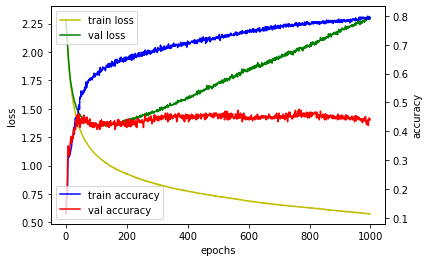

In [24]:
# 학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [25]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 0s 936us/step - loss: 2.3174 - accuracy: 0.4540


In [26]:
print("loss :", loss_and_metrics[0])
print("accuracy :", loss_and_metrics[1])

loss : 2.317365884780884
accuracy : 0.45399999618530273


In [27]:
# 6. 모델 저장 및 로드하기
model.save("model/mnist.h5")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')

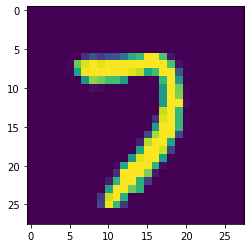

In [30]:
plt.imshow(X_val[0].reshape(28,28))

In [31]:
result = model2.predict(X_val[0].reshape(1,784))
result.argmax()

8

In [32]:
Y_val[0].argmax()

7

In [33]:
model2.predict_classes(X_val[0].reshape(1,784))

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8], dtype=int64)

## 콜백 함수

In [34]:
import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:
            print("epoch:{}, loss:{}, val_loss:{}".format(self.epoch, 
                                            logs.get('loss'), logs.get('val_loss')))
        self.epoch += 1
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
custom_hist = CustomHistory()
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=0,
                callbacks=[custom_hist])
    

epoch:0, loss:2.246981620788574, val_loss:2.2063801288604736
epoch:10, loss:1.7704095840454102, val_loss:1.742183804512024
epoch:20, loss:1.536165475845337, val_loss:1.5586752891540527
epoch:30, loss:1.392292857170105, val_loss:1.4527093172073364
epoch:40, loss:1.2875536680221558, val_loss:1.3847883939743042
epoch:50, loss:1.213523507118225, val_loss:1.3379645347595215
epoch:60, loss:1.1543753147125244, val_loss:1.3049004077911377
epoch:70, loss:1.1041722297668457, val_loss:1.2848036289215088
epoch:80, loss:1.0615408420562744, val_loss:1.265627145767212
epoch:90, loss:1.025641679763794, val_loss:1.26396644115448
epoch:100, loss:0.9967818856239319, val_loss:1.255997896194458
epoch:110, loss:0.9654520750045776, val_loss:1.248613953590393
epoch:120, loss:0.937047004699707, val_loss:1.2267273664474487
epoch:130, loss:0.9191588759422302, val_loss:1.2396568059921265
epoch:140, loss:0.8952111005783081, val_loss:1.2282304763793945
epoch:150, loss:0.8721347451210022, val_loss:1.2452791929244995

## Early Stopping
- val_loss 값이 늘어나면 epoch를 다 수행하지 않고 조기 종료

In [35]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
train_rand_idxs = np.random.choice(50000,700)
val_rand_idxs   = np.random.choice(10000,300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=30) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/1000
70/70 [==============================] - 1s 3ms/step - loss: 2.2886 - accuracy: 0.1369 - val_loss: 2.2460 - val_accuracy: 0.1667
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2240 - accuracy: 0.1818 - val_loss: 2.2160 - val_accuracy: 0.1767
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1894 - accuracy: 0.1793 - val_loss: 2.1920 - val_accuracy: 0.1800
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1991 - accuracy: 0.1770 - val_loss: 2.1639 - val_accuracy: 0.1800
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1483 - accuracy: 0.1901 - val_loss: 2.1128 - val_accuracy: 0.1800
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0931 - accuracy: 0.1920 - val_loss: 2.0793 - val_accuracy: 0.2267
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0630 - accuracy: 0.2823 - val_loss: 2.0496 - val_accuracy: 0.2333
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.4362 - accuracy: 0.4951 - val_loss: 1.6358 - val_accuracy: 0.3600
Epoch 59/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4083 - accuracy: 0.4916 - val_loss: 1.6345 - val_accuracy: 0.3667
Epoch 60/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4154 - accuracy: 0.4832 - val_loss: 1.6268 - val_accuracy: 0.3833
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.4130 - accuracy: 0.4928 - val_loss: 1.6268 - val_accuracy: 0.3867
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3694 - accuracy: 0.5019 - val_loss: 1.6292 - val_accuracy: 0.3700
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3893 - accuracy: 0.5123 - val_loss: 1.6225 - val_accuracy: 0.3967
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3870 - accuracy: 0.4785 - val_loss: 1.6227 - val_accuracy: 0.3767
Epoch 65/1000

70/70 [==============================] - 0s 1ms/step - loss: 1.1773 - accuracy: 0.5694 - val_loss: 1.5972 - val_accuracy: 0.4067
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1843 - accuracy: 0.5744 - val_loss: 1.5994 - val_accuracy: 0.4033
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1760 - accuracy: 0.5768 - val_loss: 1.6002 - val_accuracy: 0.4000
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1877 - accuracy: 0.5606 - val_loss: 1.6086 - val_accuracy: 0.4067
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1258 - accuracy: 0.5758 - val_loss: 1.5982 - val_accuracy: 0.4100
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2299 - accuracy: 0.5513 - val_loss: 1.6123 - val_accuracy: 0.4000
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2317 - accuracy: 0.5626 - val_loss: 1.5978 - val_accuracy: 0.4033
Epoch 1

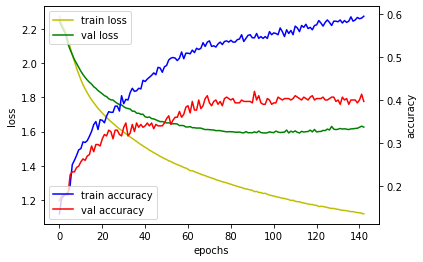

In [36]:
# 5.학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [37]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics :', loss_and_metrics)

313/313 [==============================] - 0s 916us/step - loss: 1.5438 - accuracy: 0.4331

loss_and_metrics : [1.5437591075897217, 0.43309998512268066]


In [38]:
# 7. 모델 사용하기
idx = np.random.choice(X_test.shape[0],5)

In [39]:
xhat = X_test[idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
yhat = model.predict(xhat)
yhat = np.argmax(yhat, axis=1) # 예측치
yhat

array([6, 5, 2, 1, 6], dtype=int64)

In [41]:
np.argmax(Y_test[idx], axis=1) # 실제값

array([9, 9, 2, 1, 9], dtype=int64)

In [42]:
for i in range(5):
    print(i,"번째 실제값 :", np.argmax(Y_test[idx[i]]), "\t예측값 :",
         yhat[i])

0 번째 실제값 : 9 	예측값 : 6
1 번째 실제값 : 9 	예측값 : 5
2 번째 실제값 : 2 	예측값 : 2
3 번째 실제값 : 1 	예측값 : 1
4 번째 실제값 : 9 	예측값 : 6


In [43]:
# 8. 모델 저장하기
model.save('model/mnist.h5')

In [44]:
# 9. 모델 재사용하기
from tensorflow.keras.models import load_model
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 5, 2, 1, 6], dtype=int64)

## 위 모델의 accuracy 늘리기
- 데이터 확보
- Layer층 충분히 확보

In [52]:
from tensorflow.keras.datasets import mnist # mnist 데이터셋
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Dense, Activation # model.add시
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(3)
# 1. 데이터 셋
# 훈련셋, 검증 셋 분리
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋과 검증셋 분리(X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32') / 255.0
X_val   = X_val.reshape(10000,784).astype('float32')/255.0
X_test = X_test.reshape(10000,784).astype('float32')/255.0
# 훈련셋과 검증셋 700개, 300개씩만 가져옴
# train_rand_idxs = np.random.choice(50000,700)
# val_rand_idxs   = np.random.choice(10000,300)
# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]
# X_val = X_val[val_rand_idxs]
# Y_val = Y_val[val_rand_idxs]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train)
Y_val   = utils.to_categorical(Y_val)
Y_test  = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=612, input_dim=784, activation="relu"))
model.add(Dense(units=1024, activation="relu"))
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="nadam", 
              metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping() # 성급한 조기 종료
early_stopping = EarlyStopping(patience=10) # patience 인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=10, batch_size=10, 
                validation_data=(X_val, Y_val), verbose=1,
                callbacks=[early_stopping])

Epoch 1/10
5000/5000 [==============================] - 139s 28ms/step - loss: 0.3380 - accuracy: 0.8937 - val_loss: 0.1258 - val_accuracy: 0.9615
Epoch 2/10
5000/5000 [==============================] - 142s 28ms/step - loss: 0.1178 - accuracy: 0.9655 - val_loss: 0.1082 - val_accuracy: 0.9699
Epoch 3/10
5000/5000 [==============================] - 142s 28ms/step - loss: 0.0860 - accuracy: 0.9760 - val_loss: 0.1078 - val_accuracy: 0.9711
Epoch 4/10
5000/5000 [==============================] - 143s 29ms/step - loss: 0.0734 - accuracy: 0.9795 - val_loss: 0.1216 - val_accuracy: 0.9762
Epoch 5/10
5000/5000 [==============================] - 131s 26ms/step - loss: 0.0625 - accuracy: 0.9830 - val_loss: 0.1092 - val_accuracy: 0.9746
Epoch 6/10
5000/5000 [==============================] - 133s 27ms/step - loss: 0.0519 - accuracy: 0.9862 - val_loss: 0.1175 - val_accuracy: 0.9775
Epoch 7/10
5000/5000 [==============================] - 140s 28ms/step - loss: 0.0500 - accuracy: 0.9876 - val_loss: 0

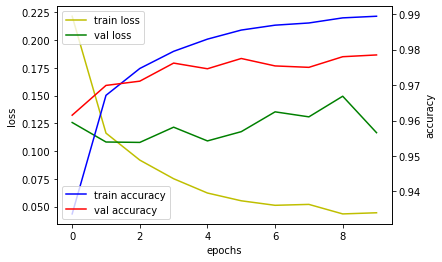

In [53]:
# 5.학습과정 표시하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'g', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx() # x축 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'], 'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'], 'r', label="val accuracy")
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

In [54]:
# 7. 모델 사용
idx = np.random.choice(X_test.shape[0],5)
xhat = X_test[idx]
yhat = model.predict_classes(xhat)
yhat

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 6, 7, 5, 0], dtype=int64)

In [55]:
# 8. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics :', loss_and_metrics)

313/313 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9794

loss_and_metrics : [0.11939841508865356, 0.9793999791145325]


In [56]:
# 9. 모델 저장
model.save('model/mnist_v1.h5')

In [57]:
# 10. 저장된 모델 재사용
from tensorflow.keras.models import load_model
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat)

array([1, 1, 7, 5, 7], dtype=int64)